<a href="https://colab.research.google.com/github/SrinithiSasi/Stock_Market_Price_Prediction/blob/main/Stock_market_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# installing yfinance module in colab
!pip install yfinance

1. What was the change in price of the stock overtime?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(15)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100,AMAZON
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000,AMAZON
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300,AMAZON
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44147500,AMAZON
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400,AMAZON
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100,AMAZON


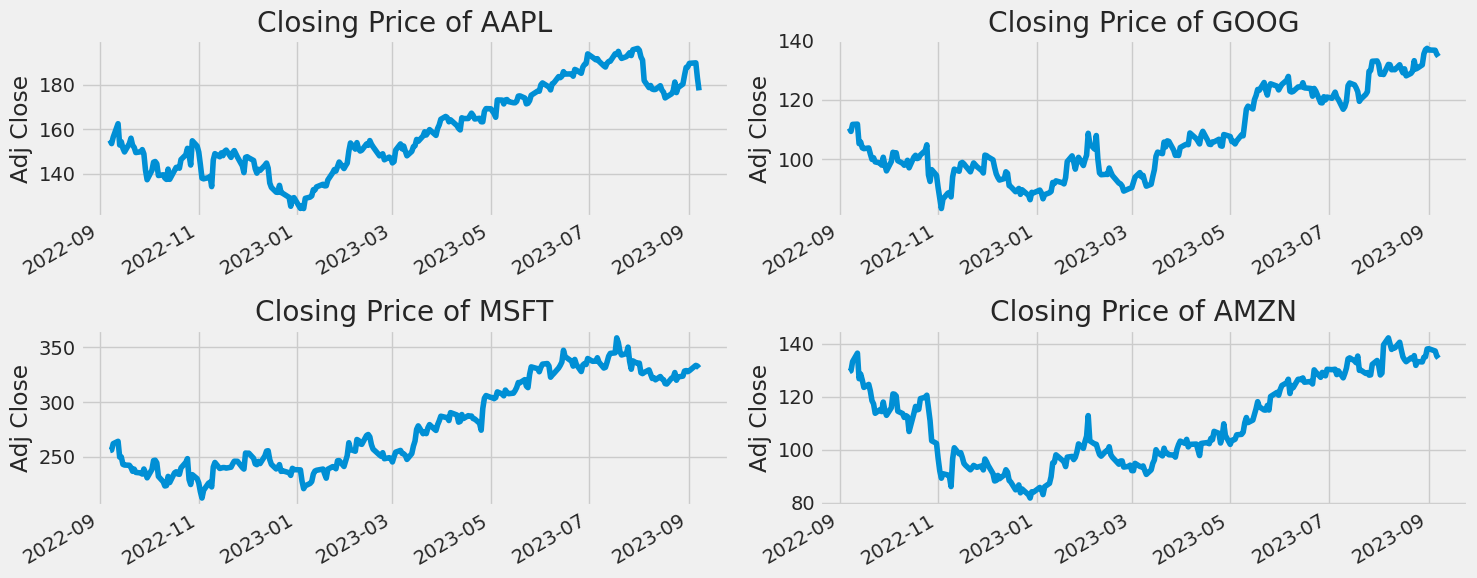

In [4]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

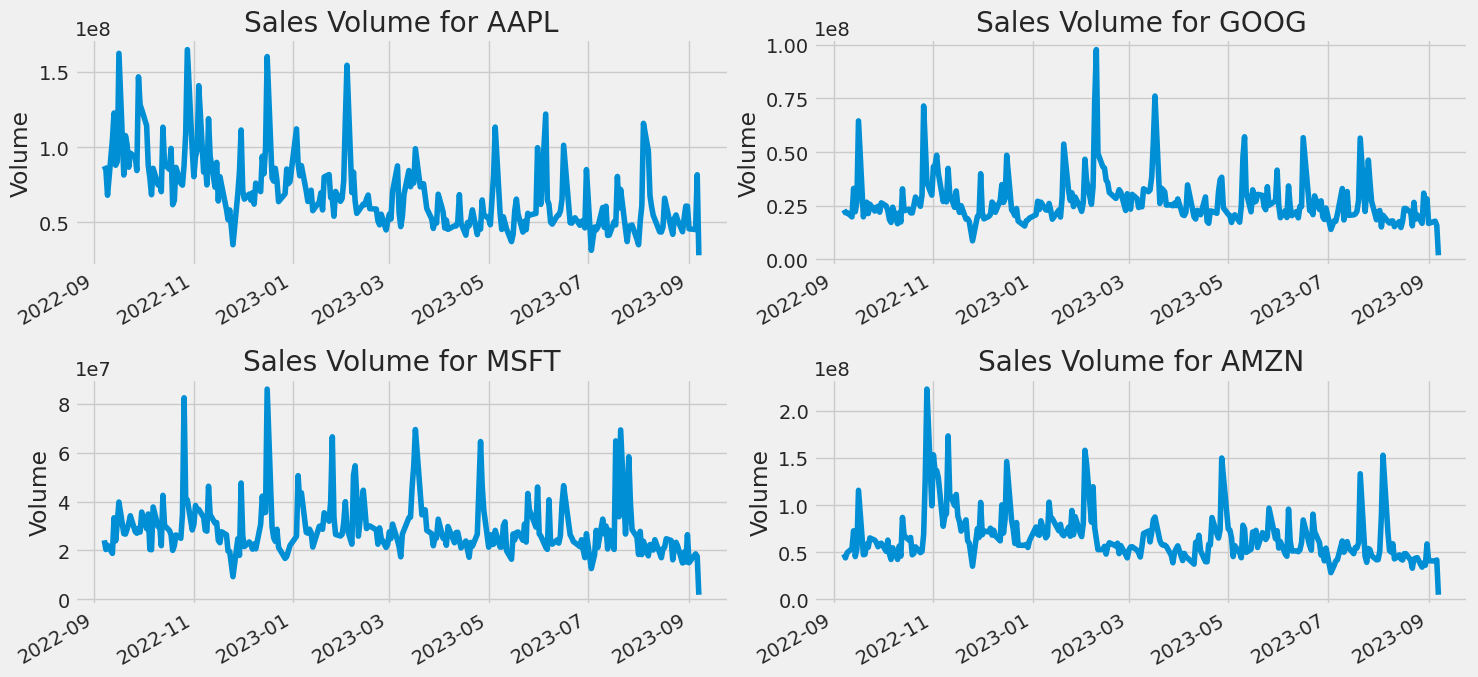

In [5]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

2. What was the moving average of the various stocks?

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [7]:
GOOG.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-07  107.760002  110.989998  107.614998  110.480003  110.480003   
2022-09-08  109.180000  110.580002  108.059998  109.419998  109.419998   
2022-09-09  110.050003  112.000000  110.000000  111.779999  111.779999   
2022-09-12  111.989998  112.639999  110.930000  111.870003  111.870003   
2022-09-13  108.889999  109.370003  105.000000  105.309998  105.309998   
...                ...         ...         ...         ...         ...   
2023-08-31  137.050003  138.399994  136.820007  137.350006  137.350006   
2023-09-01  138.429993  138.580002  135.940002  136.800003  136.800003   
2023-09-05  136.440002  137.369995  135.559998  136.710007  136.710007   
2023-09-06  137.014999  137.479996  134.690002  135.369995  135.369995   
2023-09-07  137.014999  134.899994  133.960098  1

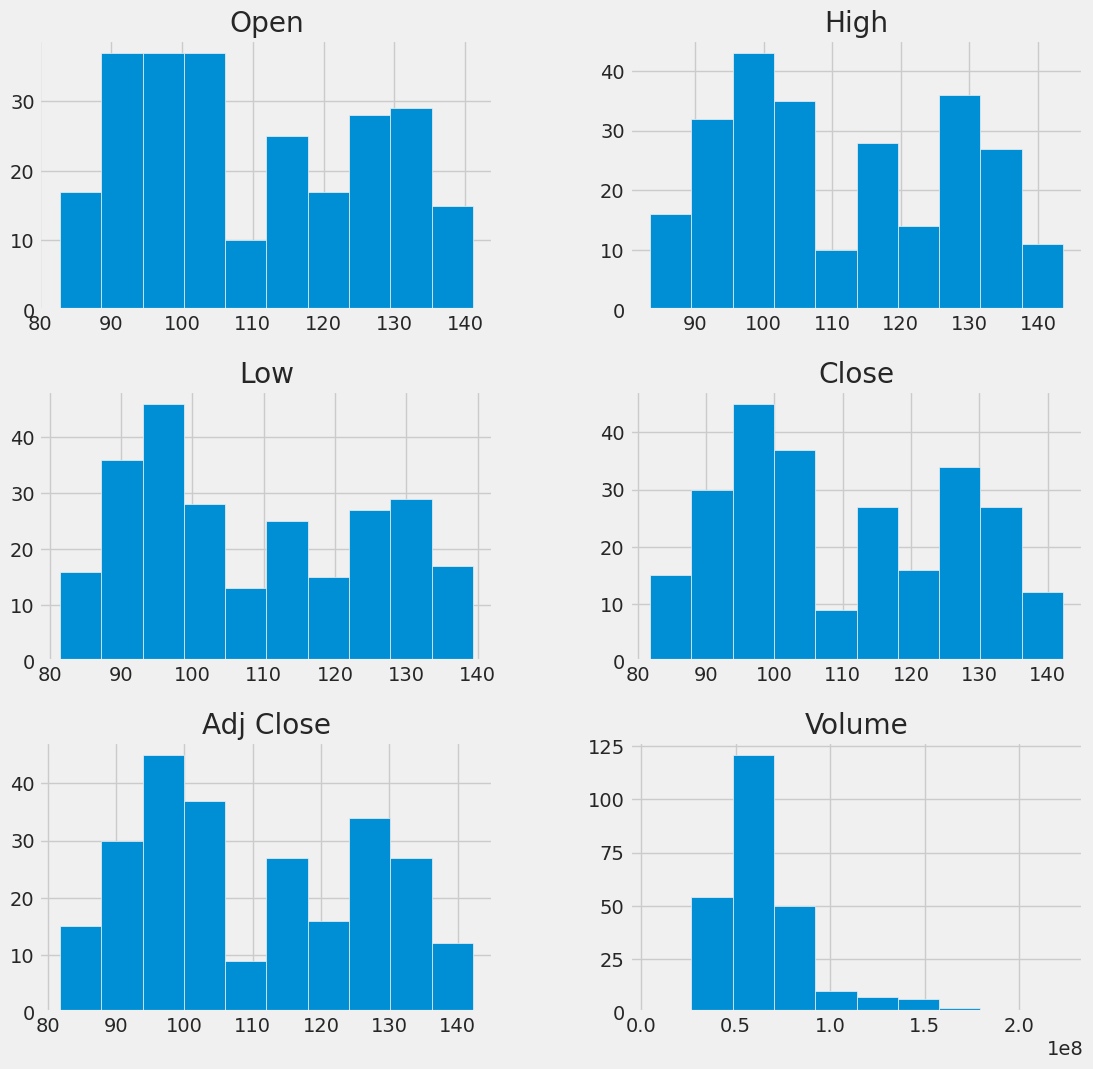

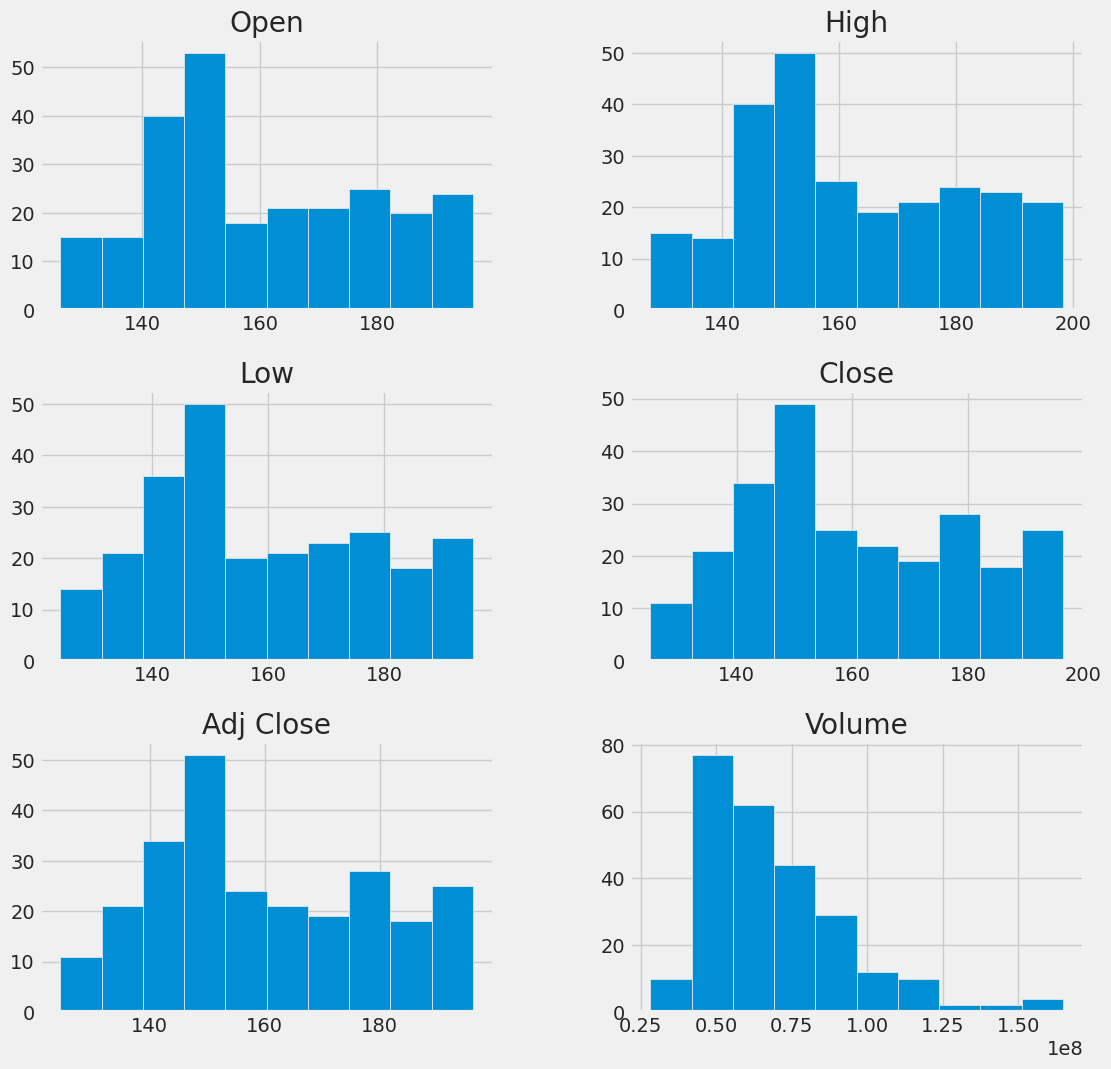

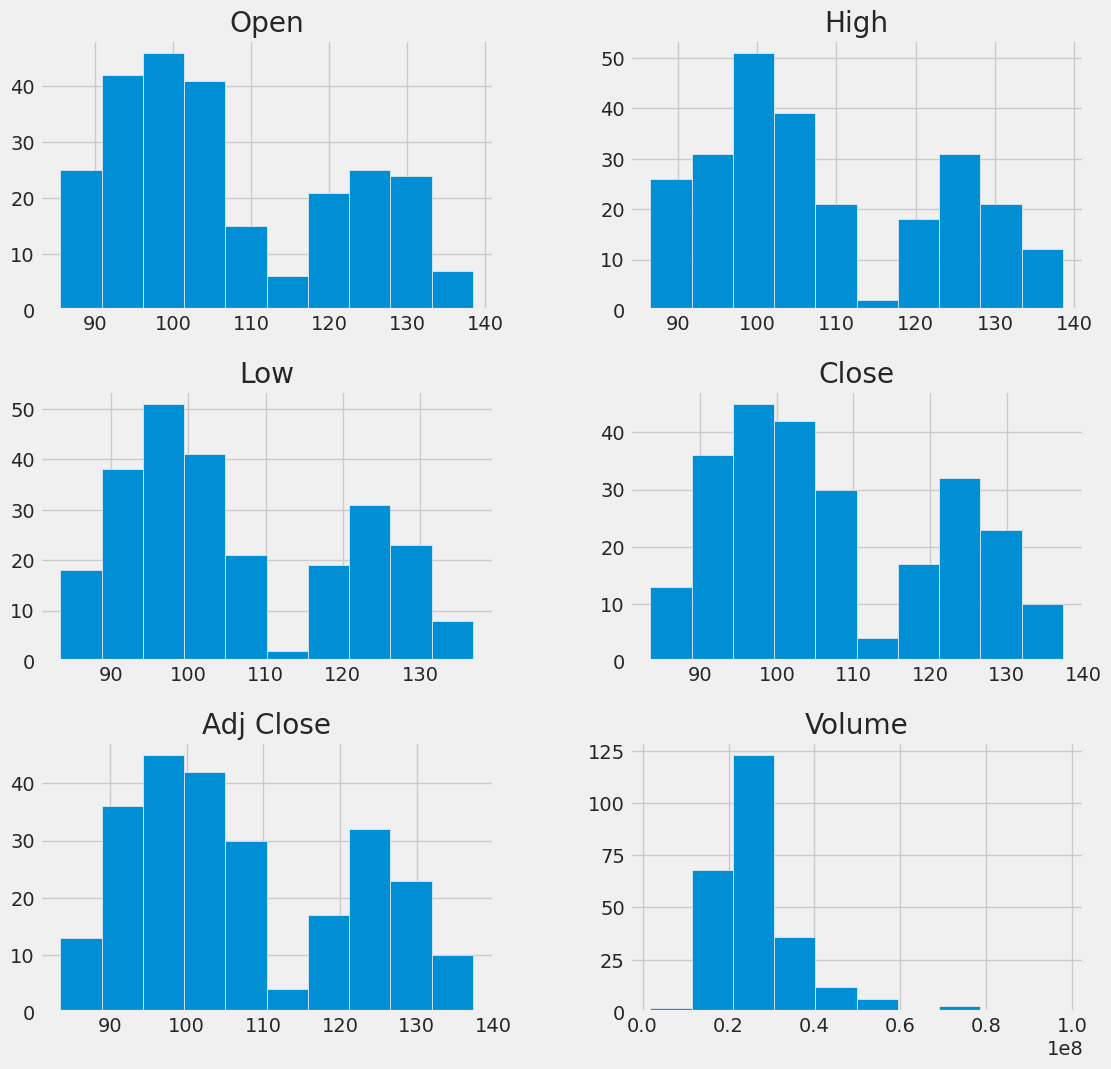

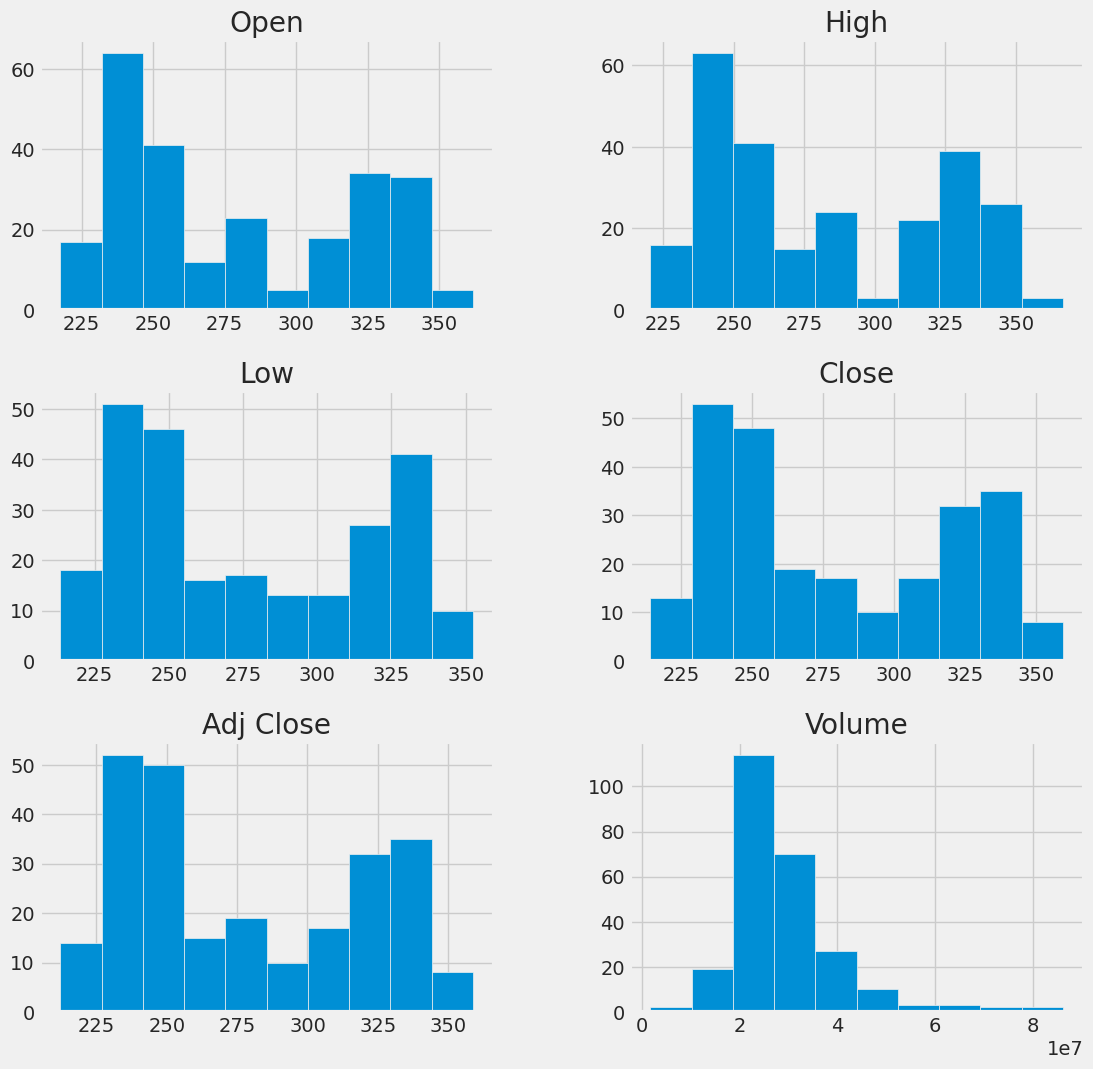

In [8]:
df.groupby("company_name").hist(figsize=(12, 12));

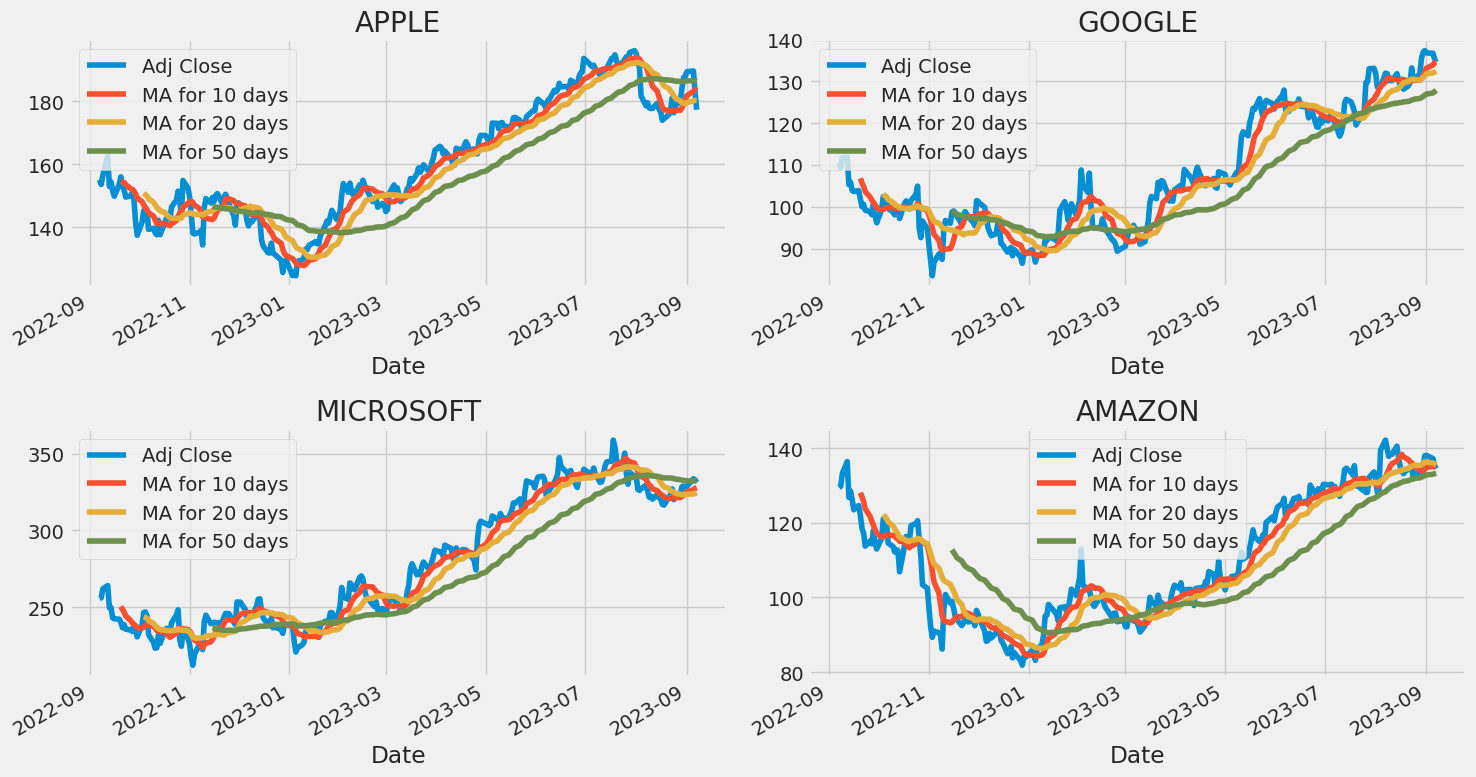

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


3) What was the daily return of the stock on average?

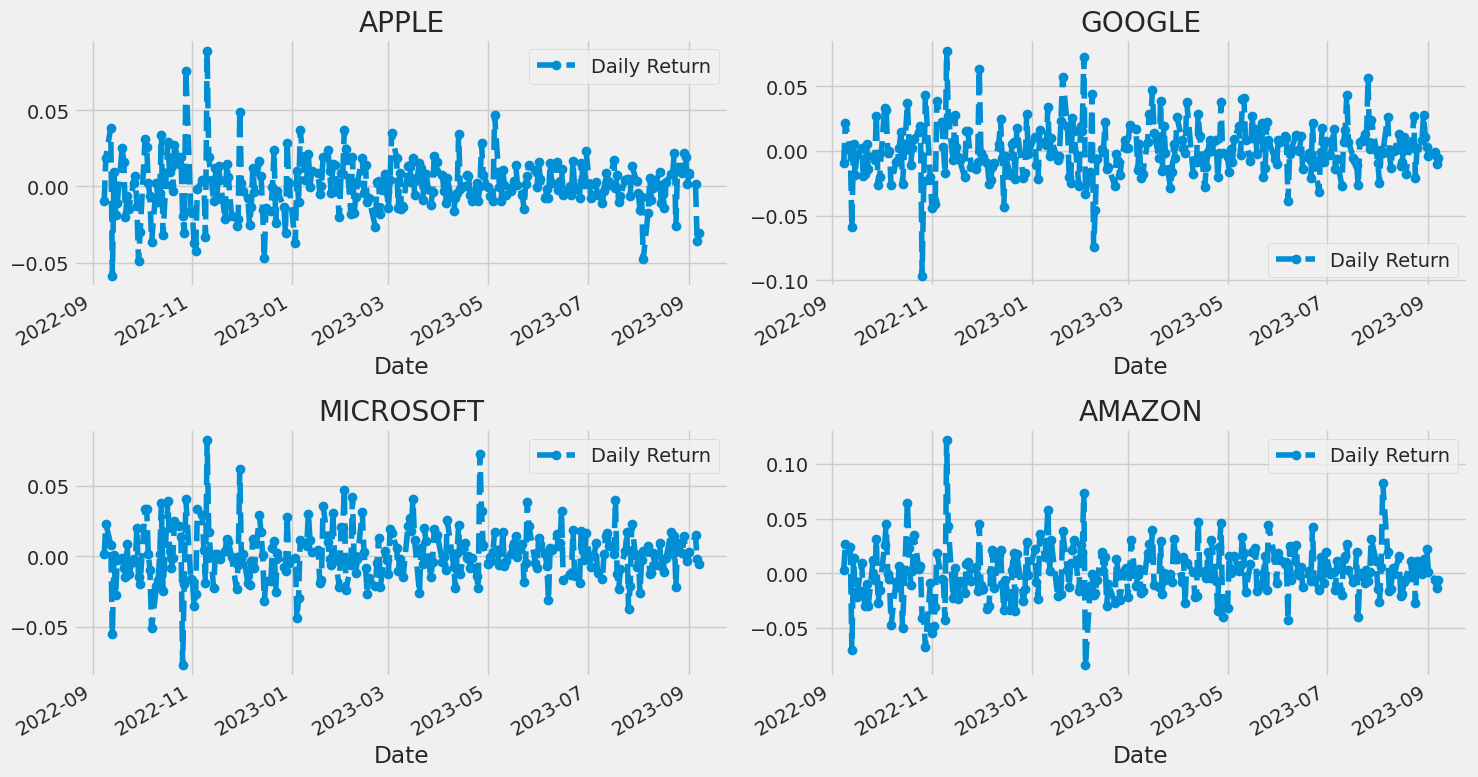

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

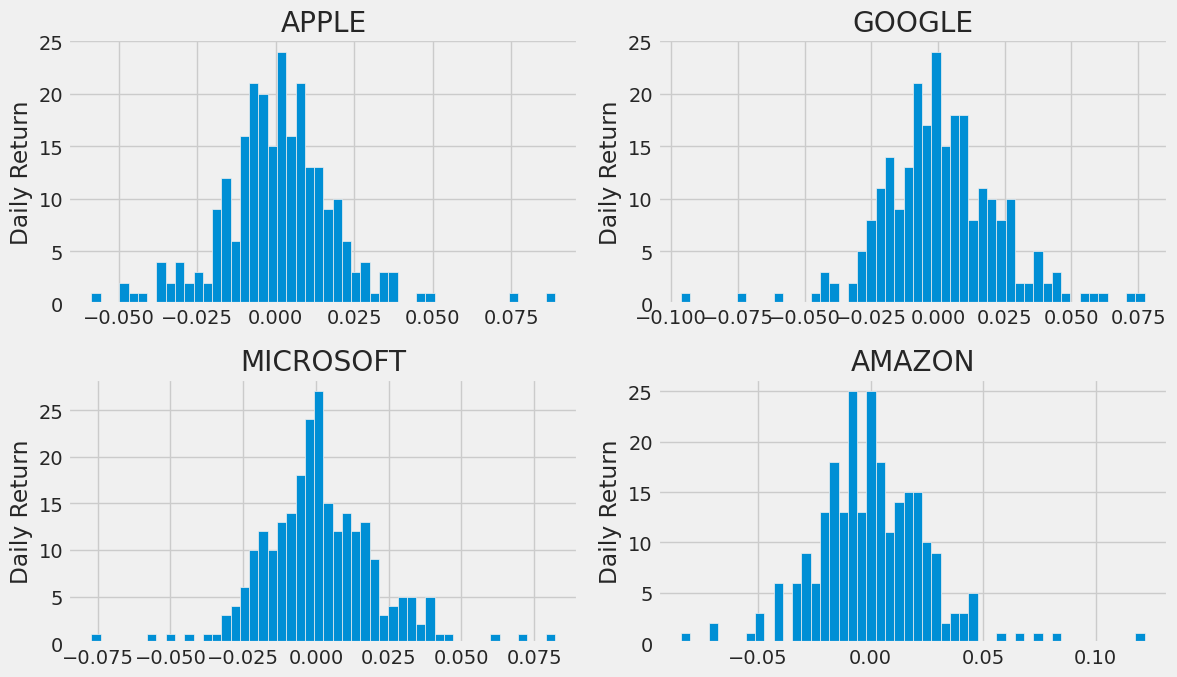

In [11]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

4. What was the correlation between different stocks closing prices?

In [12]:
yf.pdr_override()
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start, end)["Adj Close"]
# Let's take a quick look
print (closing_df.head(),end="\n\n-------------------------------------------------------------------------\n\n")
# closing_df.head()

tech_rets = closing_df.pct_change()
print(tech_rets.head())


[*********************100%%**********************]  4 of 4 completed
                  AAPL        AMZN        GOOG        MSFT
Date                                                      
2022-09-07  155.040237  129.479996  110.480003  255.620514
2022-09-08  153.549103  129.820007  109.419998  256.046387
2022-09-09  156.441910  133.270004  111.779999  261.929535
2022-09-12  162.466171  136.449997  111.870003  264.098602
2022-09-13  152.932739  126.820000  105.309998  249.578888

-------------------------------------------------------------------------

                AAPL      AMZN      GOOG      MSFT
Date                                              
2022-09-07       NaN       NaN       NaN       NaN
2022-09-08 -0.009618  0.002626 -0.009595  0.001666
2022-09-09  0.018840  0.026575  0.021568  0.022977
2022-09-12  0.038508  0.023861  0.000805  0.008281
2022-09-13 -0.058679 -0.070575 -0.058640 -0.054978


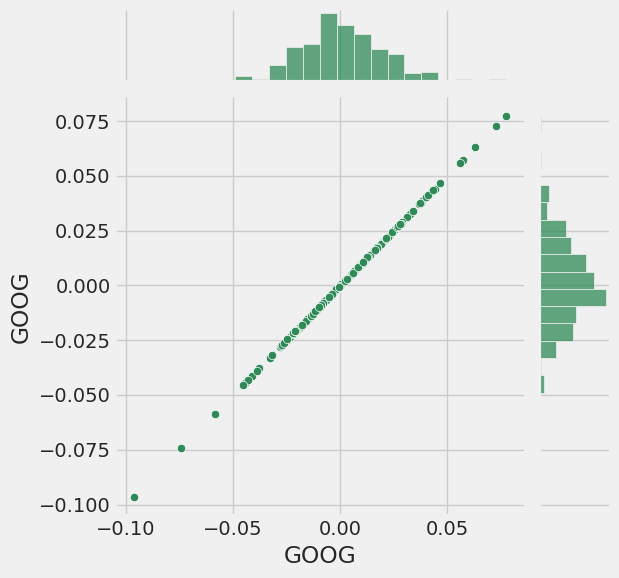

In [13]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

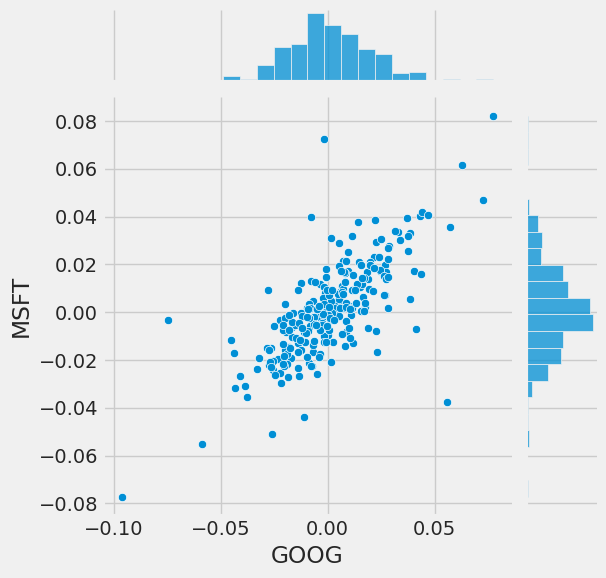

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

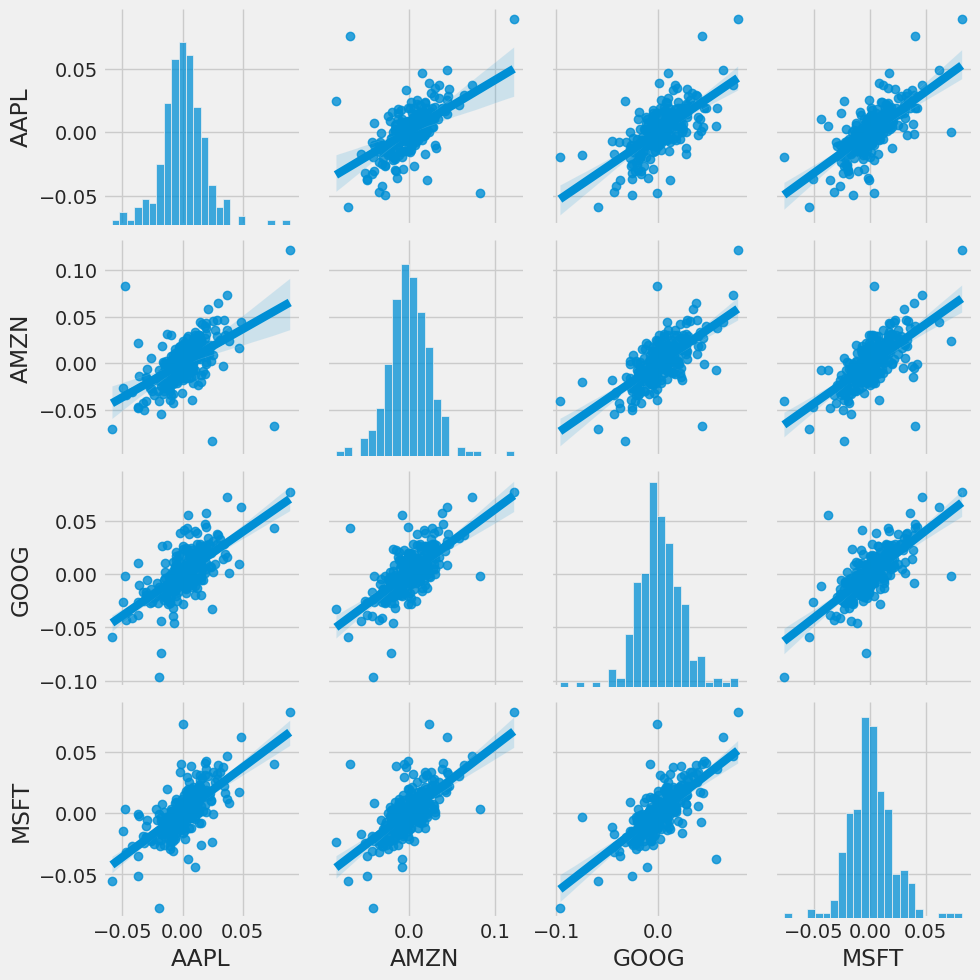

In [15]:
sns.pairplot(tech_rets, kind='reg')

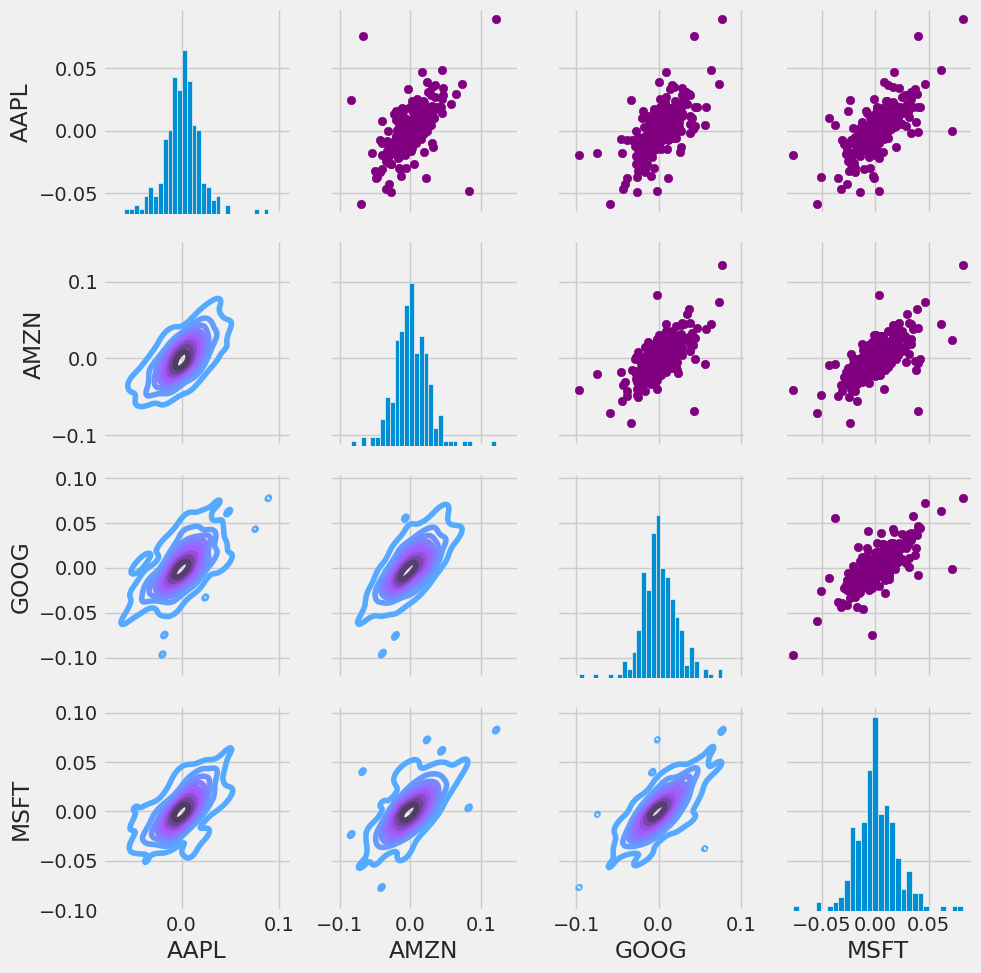

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

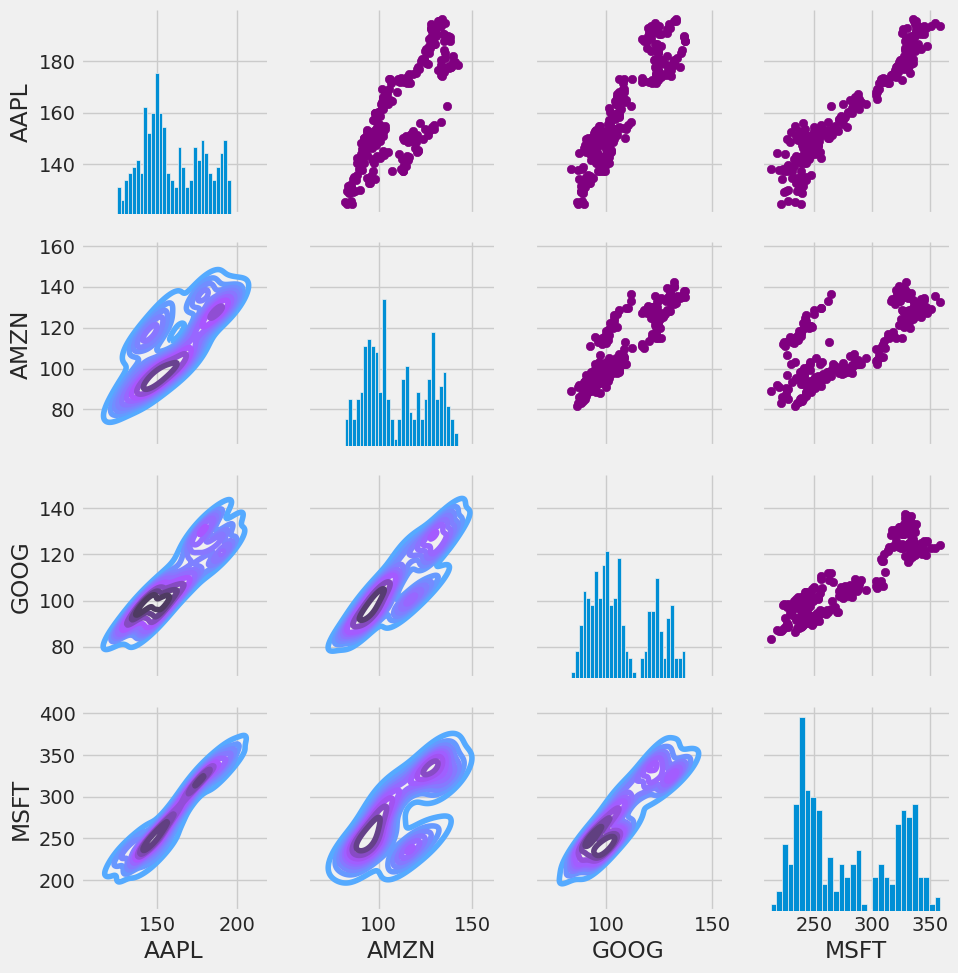

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

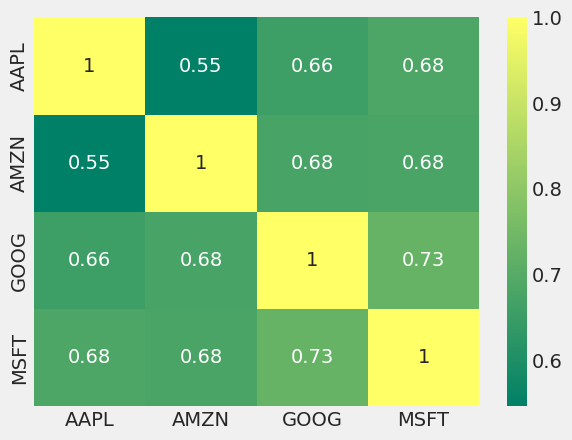

In [18]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

5. How much value do we put at risk by investing in a particular stock?

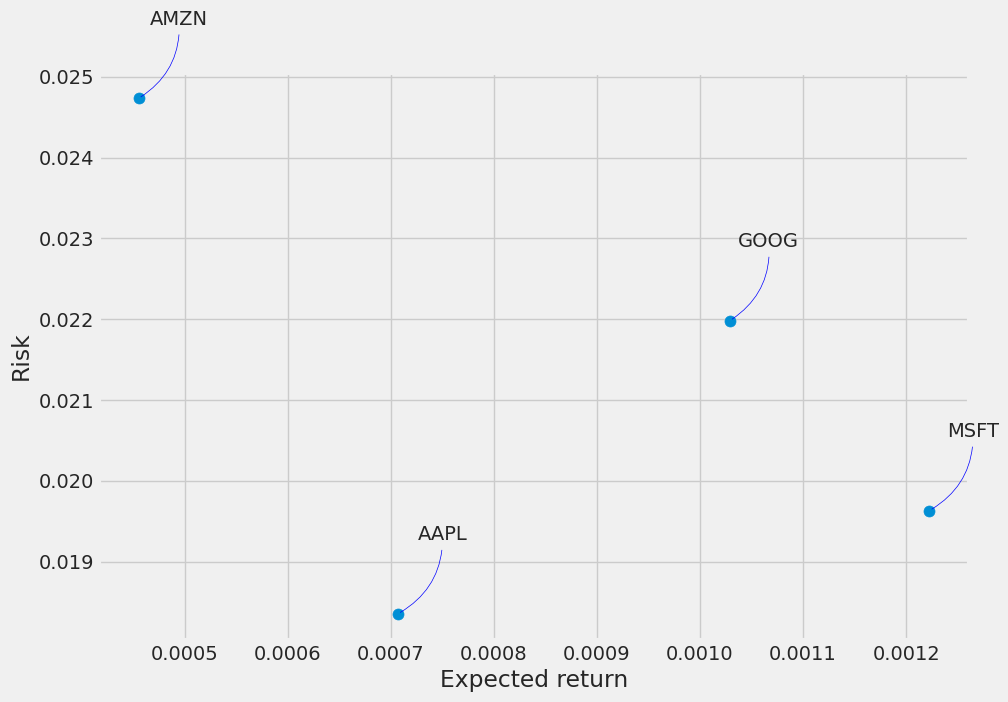

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting the closing price stock price of APPLE inc:

In [20]:
df = yf.download('AAPL', start = '2012-01-01', end='2017-01-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466093,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533088,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400
...,...,...,...,...,...,...
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.145506,56998000
2016-12-27,29.129999,29.450001,29.122499,29.315001,27.317902,73187600
2016-12-28,29.379999,29.504999,29.049999,29.190001,27.201414,83623600


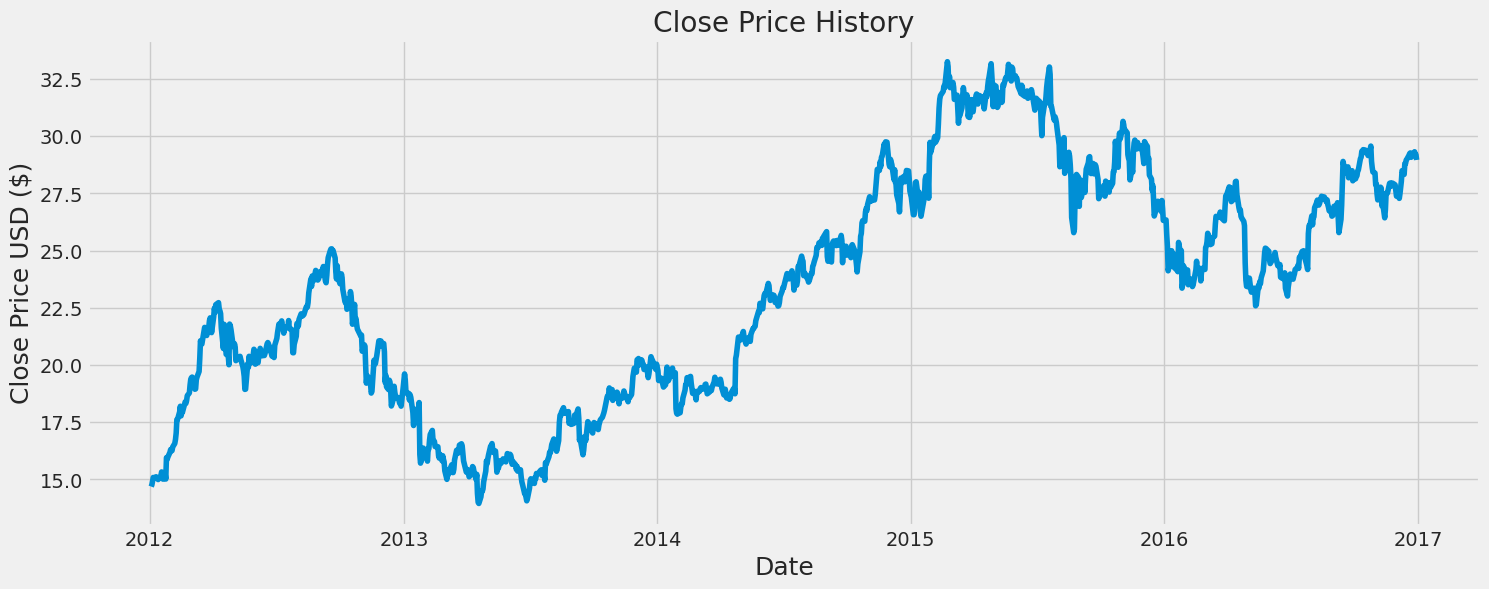

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1196

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03829999],
       [0.04238899],
       [0.05088162],
       ...,
       [0.78966458],
       [0.78927604],
       [0.77748996]])

In [24]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03829999, 0.04238899, 0.05088162, 0.05896719, 0.05772752,
       0.06052138, 0.0592447 , 0.05709842, 0.05417503, 0.06322274,
       0.07138232, 0.06886598, 0.05508164, 0.06823689, 0.0552852 ,
       0.10385403, 0.10009808, 0.10500121, 0.11560307, 0.12202338,
       0.12148682, 0.11950709, 0.12794419, 0.13588168, 0.14487391,
       0.15939832, 0.18990878, 0.19037133, 0.20735659, 0.22004919,
       0.19823491, 0.20663495, 0.20646845, 0.23002205, 0.22667306,
       0.23287134, 0.2440098 , 0.25020818, 0.26806299, 0.28107012,
       0.28482612, 0.28613985, 0.26389998, 0.25853421, 0.25932985,
       0.28023761, 0.28612137, 0.29875854, 0.32854736, 0.36829057,
       0.36085258, 0.36087106, 0.38960535, 0.39859758, 0.39219565,
       0.38634895, 0.38026164, 0.40048472, 0.4143616 , 0.42017134])]
[0.40581343862378805]

[array([0.03829999, 0.04238899, 0.05088162, 0.05896719, 0.05772752,
       0.06052138, 0.0592447 , 0.05709842, 0.05417503, 0.06322274,
       0.07138232, 0.06886598, 0.05

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1136/1136 [==============================] - 57s 47ms/step - loss: 0.0042


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 36ms/step


0.8440470113733379

<ipython-input-27-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


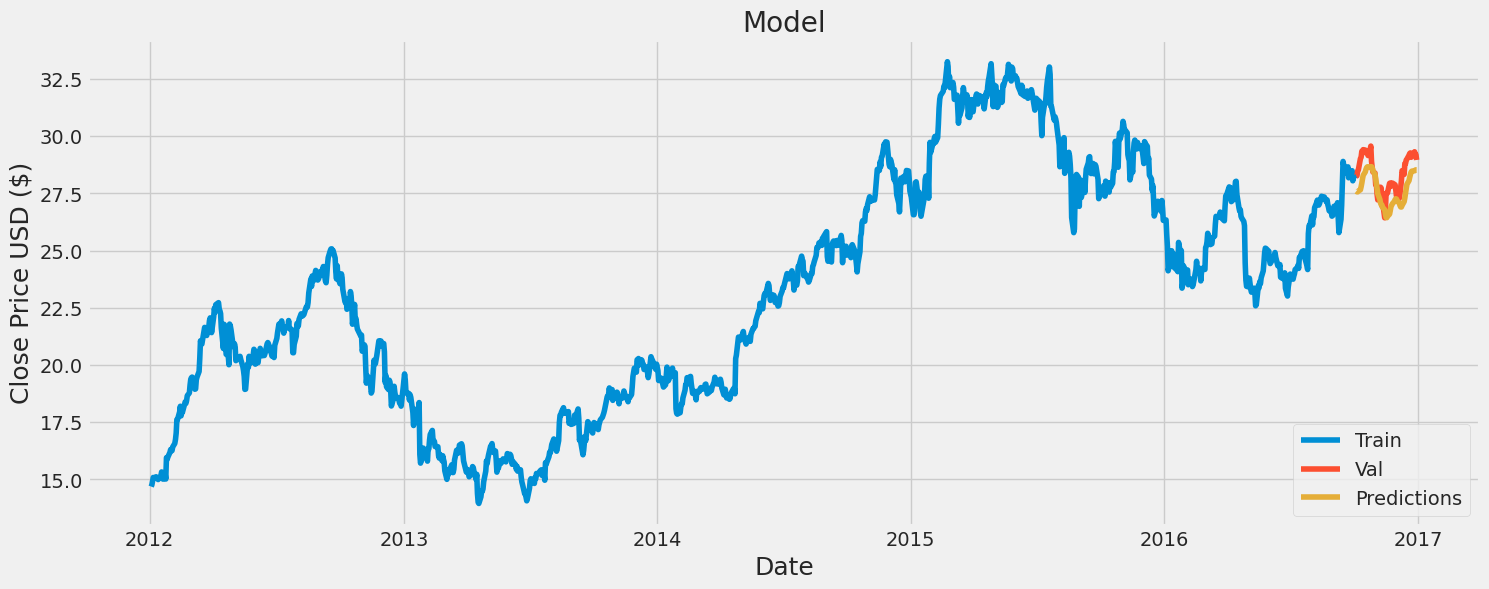

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
valid

,Close,Predictions
Date,,
2016-10-04,28.250000,27.589197
2016-10-05,28.262501,27.567097
2016-10-06,28.472500,27.561783
2016-10-07,28.514999,27.596880
2016-10-10,29.012501,27.653109
...,...,...
2016-12-23,29.129999,28.465881
2016-12-27,29.315001,28.484529
2016-12-28,29.190001,28.513454
